In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [12]:
#loading iris dataset

iris=pd.read_csv("/content/Iris.csv")
iris_df=pd.DataFrame(iris)
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Load the iris dataset
#iris = datasets.load_iris()
#iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [20]:
x=iris.drop(["Id","Species"] ,axis=1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


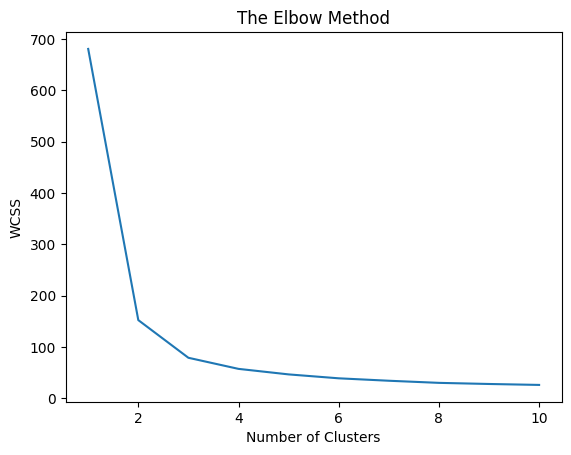

In [25]:
from pandas.core.common import random_state
#Finding optimum number of clusters for kmeans classifiction
q=iris_df.iloc[:,[1,2,3,4]].values

from sklearn.cluster import KMeans
WCSS=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
  kmeans.fit(q)
  WCSS.append(kmeans.inertia_)

  #plotting line graphs and observing elbow curve

plt.plot(range(1,11),WCSS)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [30]:
#Applying Kmeans to Dataset

kmeans=KMeans(n_clusters=3,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_means=kmeans.fit_predict(q)

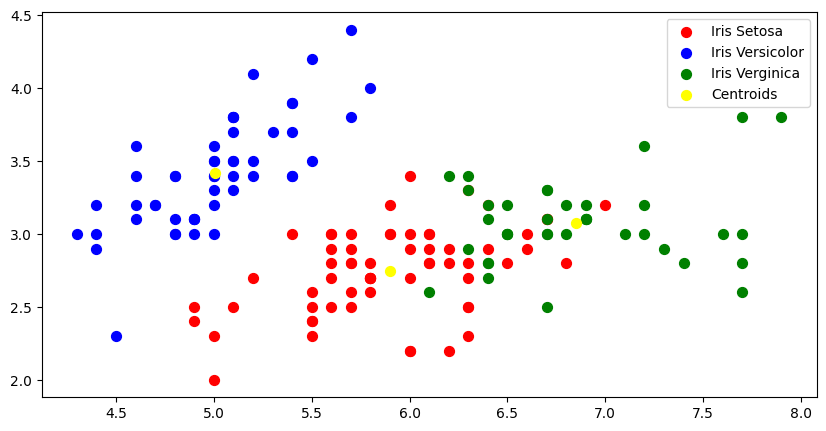

In [43]:
#Visualuzing the clusters

plt.rcParams['figure.figsize']=[10,5]
plt.scatter(q[y_means==0,0],q[y_means==0,1]
            ,s=50,c="red",marker="o",label='Iris Setosa')
plt.scatter(q[y_means==1,0],q[y_means==1,1]
            ,s=50,c='Blue',marker="o",label='Iris Versicolor')
plt.scatter(q[y_means==2,0],q[y_means==2,1]
            ,s=50,c='green',label='Iris Verginica')

#plotting Centroids of clusters

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1]
            ,s=50,c='yellow',label='Centroids')
plt.legend()